In [1]:
import cv2
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt
import math
from math import atan2, cos, sin, sqrt, pi
from sympy import Point, Polygon, Line, Segment

#custom libraries
from TrajectoryPlanner import Node, Planner
from Vision import Vision

Frame shape: (480, 640, 3)


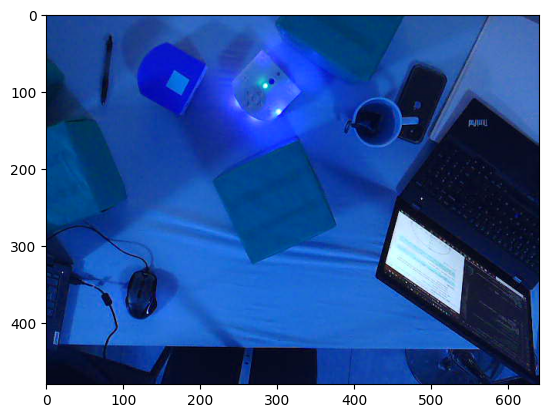

In [2]:
#=== MAIN ===

#Obstacle detection
camera = cv2.VideoCapture(1)
ret, frame = camera.read()
frame = np.array(frame)
plt.imshow(frame)
print("Frame shape: " + str(frame.shape))

Position: (0, 0) , goal: 0,0


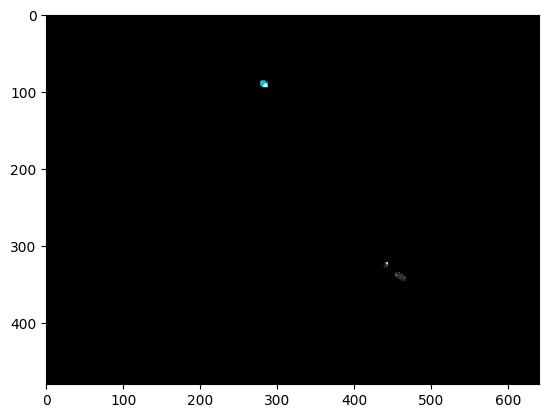

In [3]:
min_blue = np.array([70, 80, 0])
min_red = np.array([70, 80, 0])

max_blue = np.array([70, 80, 0])
max_red = np.array([70, 80, 0])

min_green = np.array([21, 0, 0])
max_green = np.array([80, 255, 216])

vision = Vision()
x_center,y_center, goal_detected = vision.get_goal_position(frame)
center, radius, angle, thymio_detected = vision.get_thymio_position(frame,(0,0),0)
print("Position: {0} , goal: {1},{2}".format(center,x_center,y_center))
vertices = vision.get_obstacle_position(frame,radius,min_green,max_green)[0]

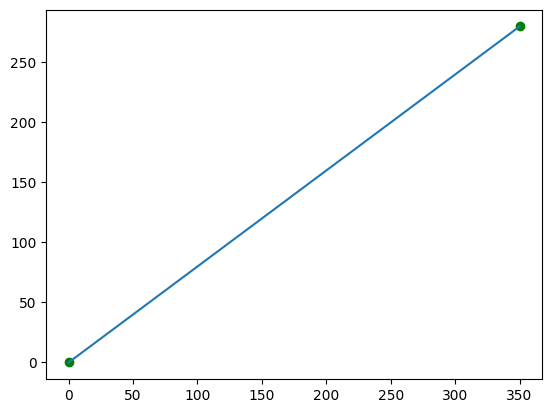

In [4]:
#Planning
planner = Planner()
planner.setup(vertices,[0,0],[350,280])
planner.plot()

In [ ]:
x = 0
y = 0
while not goal:
    x,y,angle = estimate_position()
    if not obstacle:
        controller_trajectory(x,y,angle,path)
    else:
        controller_obstacle_avoid(x,y,angle,path)
        if not obstacle:
            path = replan()
        